In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.contrib import ffmpeg

In [3]:
from model import model, samples_per_second, timeslice_size


input_file = tf.read_file(r'./bensound-goinghigher.mp3')
input_data = ffmpeg.decode_audio(input_file, file_format='mp3',
                                 samples_per_second=samples_per_second,
                                 channel_count=1)

input_len = tf.shape(input_data)[0]
input_data = tf.slice(input_data, [0, 0], [input_len - input_len % timeslice_size, 1])
input_sliced = tf.reshape(input_data, [-1, timeslice_size])
encoded, decoded = model(input_sliced)

slices_output = decoded
output_data = tf.reshape(slices_output, (-1, 1))
output_wav = ffmpeg.encode_audio(output_data, file_format='wav',
                                 samples_per_second=samples_per_second)
output_file = tf.write_file(r'./regenerated.wav', output_wav)
saver = tf.train.Saver()
init = tf.global_variables_initializer()


INFO:tensorflow:Restoring parameters from ./save/audio-autoencoder


In [10]:
with tf.Session() as session:
    # session.run(init)
    saver.restore(session, './save/audio-autoencoder')
    original, reconstructed = session.run([input_data, output_data])

INFO:tensorflow:Restoring parameters from ./save/audio-autoencoder


In [5]:
print(original.shape)
print(reconstructed.shape)

(10783675, 1)
(10783675, 1)


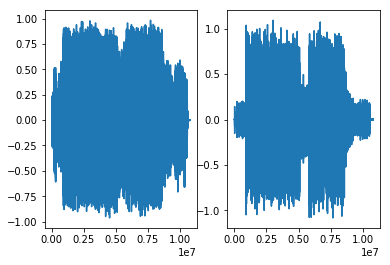

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(original)
ax2.plot(reconstructed)

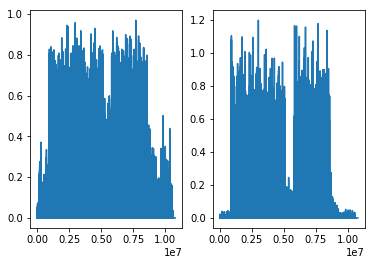

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)


def norm(z):
    im = np.imag(z)
    re = np.real(z)
    return im * im + re * re


ax1.plot(norm(np.fft.rfft(original)))
ax2.plot(norm(np.fft.rfft(reconstructed)))
